<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Clase 2</h3>
    <h5>Ejercicio 3</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from scipy.stats.distributions import chi2


matplotlib.rcParams['figure.figsize']=[12.0,8.0]
import warnings
warnings.filterwarnings('ignore')

In [13]:
import requests
import urllib.parse

def get_api_call(ids, **kwargs):
    API_BASE_URL = "https://apis.datos.gob.ar/series/api/"
    kwargs["ids"] = ",".join(ids)
    return "{}{}?{}".format(API_BASE_URL, "series", urllib.parse.urlencode(kwargs))

In [14]:
api_call = get_api_call(["148.3_INIVELNAL_DICI_M_26"])
print(api_call)

# 168.1_T_CAMBIOR_D_0_0_26        ----> otra base a llamar

https://apis.datos.gob.ar/series/api/series?ids=148.3_INIVELNAL_DICI_M_26


In [15]:
result = requests.get(api_call).json()
print(result)

{'data': [['2016-12-01', 100.0], ['2017-01-01', 101.5859], ['2017-02-01', 103.6859], ['2017-03-01', 106.1476], ['2017-04-01', 108.9667], ['2017-05-01', 110.5301], ['2017-06-01', 111.8477], ['2017-07-01', 113.7852], ['2017-08-01', 115.3819], ['2017-09-01', 117.5719], ['2017-10-01', 119.3528], ['2017-11-01', 120.994], ['2017-12-01', 124.7956], ['2018-01-01', 126.9887], ['2018-02-01', 130.0606], ['2018-03-01', 133.1054], ['2018-04-01', 136.7512], ['2018-05-01', 139.5893], ['2018-06-01', 144.8053], ['2018-07-01', 149.2966], ['2018-08-01', 155.1034], ['2018-09-01', 165.2383], ['2018-10-01', 174.1473], ['2018-11-01', 179.6388], ['2018-12-01', 184.2552], ['2019-01-01', 189.6101], ['2019-02-01', 196.7501], ['2019-03-01', 205.9571], ['2019-04-01', 212.9596414], ['2019-05-01', 219.5691], ['2019-06-01', 225.537], ['2019-07-01', 230.494], ['2019-08-01', 239.6077], ['2019-09-01', 253.7102], ['2019-10-01', 262.0661], ['2019-11-01', 273.2158], ['2019-12-01', 283.4442], ['2020-01-01', 289.8299], ['202

In [16]:
print(result["data"])

[['2016-12-01', 100.0], ['2017-01-01', 101.5859], ['2017-02-01', 103.6859], ['2017-03-01', 106.1476], ['2017-04-01', 108.9667], ['2017-05-01', 110.5301], ['2017-06-01', 111.8477], ['2017-07-01', 113.7852], ['2017-08-01', 115.3819], ['2017-09-01', 117.5719], ['2017-10-01', 119.3528], ['2017-11-01', 120.994], ['2017-12-01', 124.7956], ['2018-01-01', 126.9887], ['2018-02-01', 130.0606], ['2018-03-01', 133.1054], ['2018-04-01', 136.7512], ['2018-05-01', 139.5893], ['2018-06-01', 144.8053], ['2018-07-01', 149.2966], ['2018-08-01', 155.1034], ['2018-09-01', 165.2383], ['2018-10-01', 174.1473], ['2018-11-01', 179.6388], ['2018-12-01', 184.2552], ['2019-01-01', 189.6101], ['2019-02-01', 196.7501], ['2019-03-01', 205.9571], ['2019-04-01', 212.9596414], ['2019-05-01', 219.5691], ['2019-06-01', 225.537], ['2019-07-01', 230.494], ['2019-08-01', 239.6077], ['2019-09-01', 253.7102], ['2019-10-01', 262.0661], ['2019-11-01', 273.2158], ['2019-12-01', 283.4442], ['2020-01-01', 289.8299], ['2020-02-01',

In [17]:
# Transformo diccionario en dataframe
df = pd.DataFrame.from_dict(result["data"])
df.columns = ['indice_tiempo', 'ipc_nivel_general_nacional']
print(df)

   indice_tiempo  ipc_nivel_general_nacional
0     2016-12-01                    100.0000
1     2017-01-01                    101.5859
2     2017-02-01                    103.6859
3     2017-03-01                    106.1476
4     2017-04-01                    108.9667
..           ...                         ...
76    2023-04-01                   1497.2147
77    2023-05-01                   1613.5895
78    2023-06-01                   1709.6115
79    2023-07-01                   1818.0838
80    2023-08-01                   2044.2832

[81 rows x 2 columns]


In [18]:
# HTTPError: HTTP Error 403: Forbidden
# import pandas as pd

# df = pd.read_csv(get_api_call(
#     ["148.3_INIVELNAL_DICI_M_26"],
#     format="csv", start_date=2016
# ))

In [19]:
analisis=[]
for fila in range(0, len(df)):
  if fila-1<0:
    resultado = 0
  else:
    valor_anterior=df.ipc_nivel_general_nacional[fila-1]
    valor_actual=df.ipc_nivel_general_nacional[fila]
    resultado = round((( valor_actual / valor_anterior ) - 1 ) * 100,2)
  # print(resultado)
  analisis.append(resultado)

print(analisis)
type(analisis)

[0, 1.59, 2.07, 2.37, 2.66, 1.43, 1.19, 1.73, 1.4, 1.9, 1.51, 1.38, 3.14, 1.76, 2.42, 2.34, 2.74, 2.08, 3.74, 3.1, 3.89, 6.53, 5.39, 3.15, 2.57, 2.91, 3.77, 4.68, 3.4, 3.1, 2.72, 2.2, 3.95, 5.89, 3.29, 4.25, 3.74, 2.25, 2.01, 3.34, 1.5, 1.54, 2.24, 1.93, 2.7, 2.84, 3.76, 3.16, 4.01, 4.05, 3.57, 4.81, 4.08, 3.32, 3.17, 3.0, 2.47, 3.55, 3.52, 2.53, 3.84, 3.88, 4.69, 6.73, 6.05, 5.05, 5.3, 7.41, 6.97, 6.17, 6.35, 4.92, 5.12, 6.03, 6.63, 7.68, 8.4, 7.77, 5.95, 6.34, 12.44]


list

In [20]:
Datos = df.assign(analisis = analisis)

In [21]:
Datos.indice_tiempo = pd.to_datetime(Datos.indice_tiempo, dayfirst = True)
Datos.set_index("indice_tiempo", inplace=True)

In [22]:
Datos.drop(['2016-12-01'],inplace=True)

KeyError: "['2016-12-01'] not found in axis"

In [23]:
Datos.dtypes

ipc_nivel_general_nacional    float64
analisis                      float64
dtype: object

In [24]:
Datos.tail()

,ipc_nivel_general_nacional,analisis
indice_tiempo,,
2023-01-04,1497.2147,8.40
2023-01-05,1613.5895,7.77
2023-01-06,1709.6115,5.95
2023-01-07,1818.0838,6.34
2023-01-08,2044.2832,12.44


VEMOS COMO SE COMPORTA UNA SERIE EXPLOSIVA =

<Axes: xlabel='indice_tiempo'>

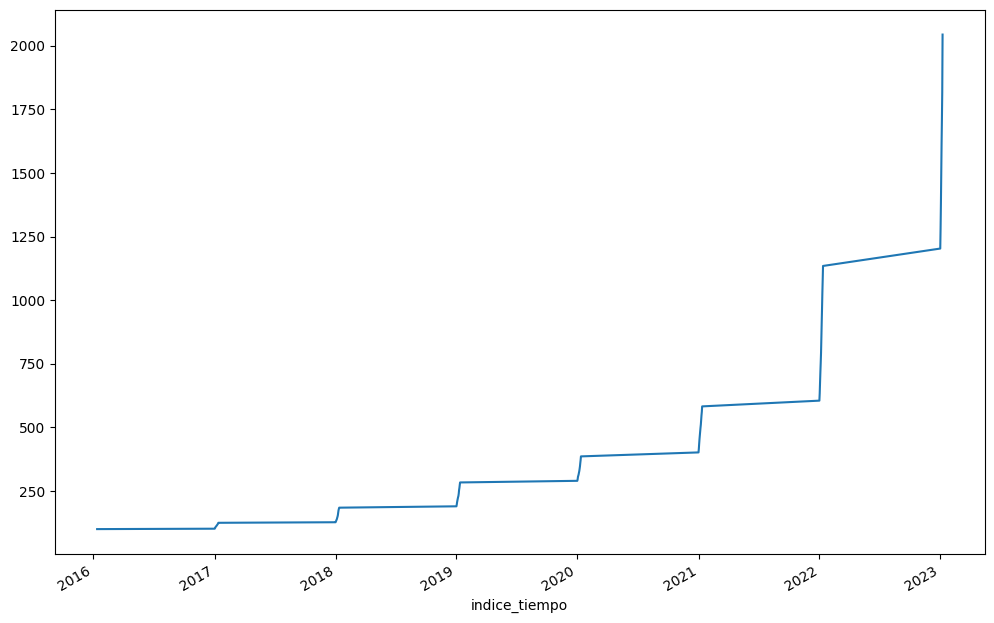

In [25]:
Datos.ipc_nivel_general_nacional.plot()

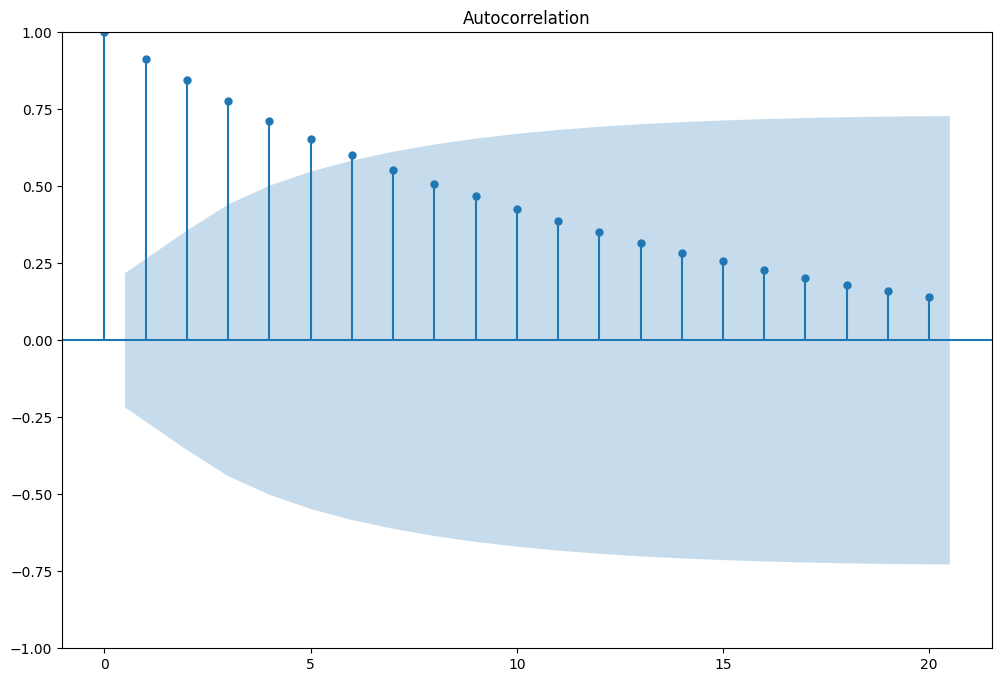

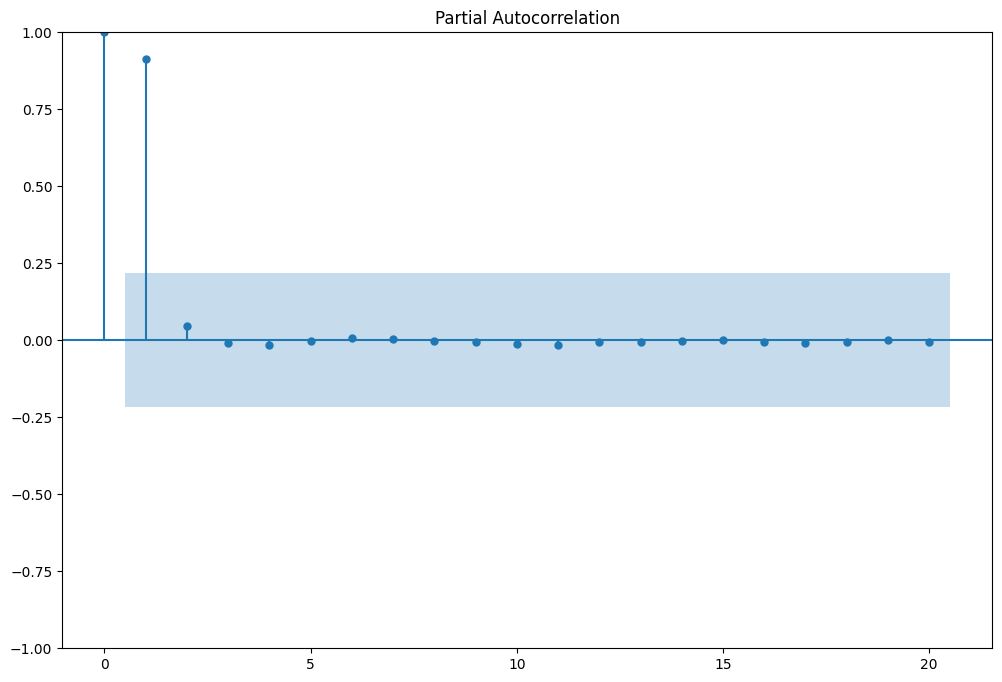

In [26]:
plot_acf(Datos.ipc_nivel_general_nacional);
plot_pacf(Datos.ipc_nivel_general_nacional);

In [27]:
model = sm.tsa.arima.ARIMA(Datos.ipc_nivel_general_nacional, order=(1,0,0))
result = model.fit()

AQUI VEMOS LAS RAICES DEL MODELO AR1. QUE SON TENDIENDO A 1. ES DECIR, TIENEN UN COMPRTAMIENTO EXPLOSIVO

In [28]:
result.arroots

array([1.00077259])

In [29]:
result.arroots

array([1.00077259])

Ahora vamos a analizar teniendo en cuenta el % de variacion mensual. Y le aplicamos un modelo AR(1)

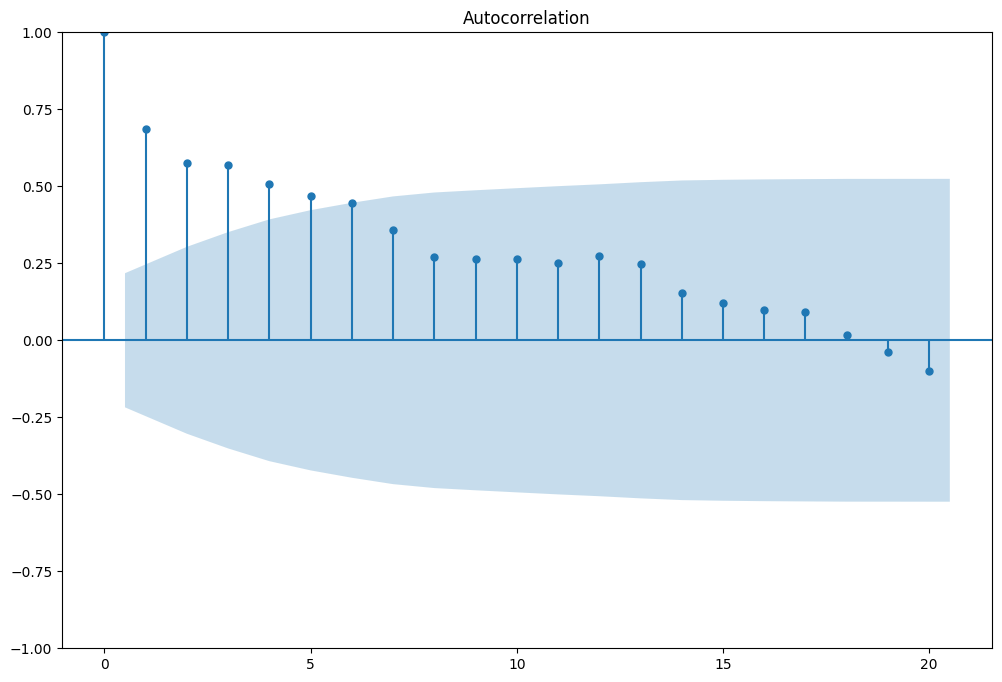

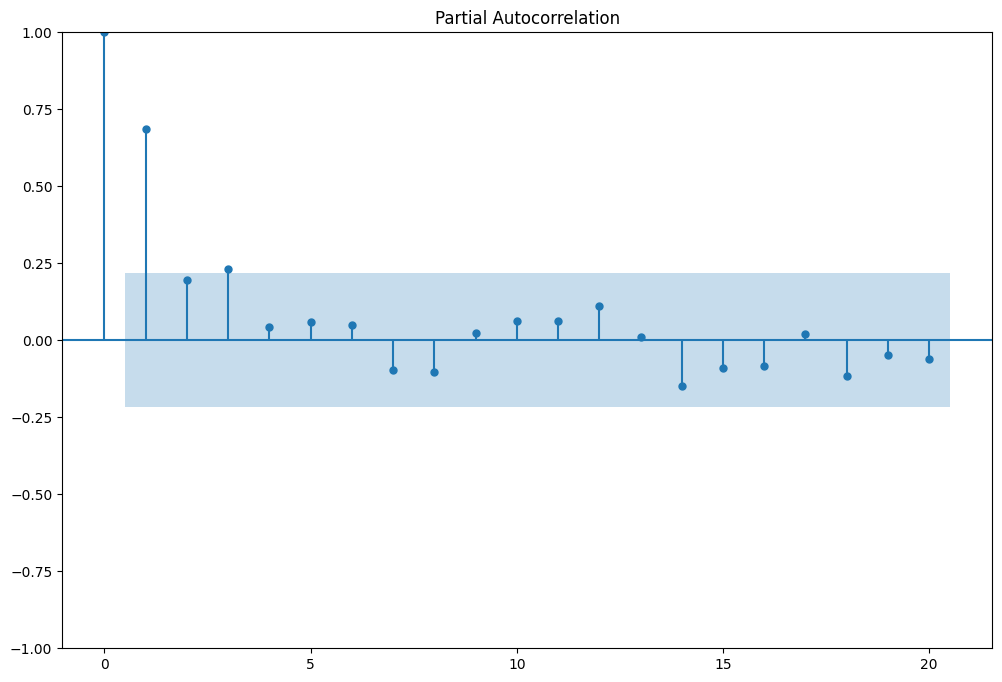

In [30]:
plot_acf(Datos.analisis);
plot_pacf(Datos.analisis);

In [31]:
model = sm.tsa.arima.ARIMA(Datos.analisis, order=(1,0,0))
result = model.fit()

In [32]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               analisis   No. Observations:                   81
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -132.202
Date:                Tue, 10 Oct 2023   AIC                            270.405
Time:                        23:01:36   BIC                            277.588
Sample:                             0   HQIC                           273.287
                                 - 81                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2642      1.336      3.192      0.001       1.646       6.882
ar.L1          0.9025      0.089     10.141      0.000       0.728       1.077
sigma2         1.5002      0.158      9.473      0.000       1.190       1.811
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):               182.07
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               2.14   Skew:                             1.56
Prob(H) (two-sided):                  0.05   Kurtosis:                         9.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
# defino diferentes variables para realizar analisis

T = result.resid.shape[0]  # número de datos
M = 7   # máximo número de rezagos que elijo
rezagos = np.arange(1, M+1)
alpha = 0.05  # significancia de los test


In [34]:
print(rezagos)

[1 2 3 4 5 6 7]


In [35]:
rho = sm.tsa.acf(result.resid, fft=True, nlags=M)[1:]
rho
# Aqui vemos si los numeros son grandes o pequeños.
# Si son grandes es evidencia en contra de que los rezagos son ruido blanco ( si son pequeños es una evidencia, a favor del ruido blanco).

array([-0.08023652, -0.19454585,  0.05596448, -0.05305513,  0.03373479,
        0.24001847,  0.04045624])

Calculamos las autocorrelaciones. Esto lo hacemos gracias al modulo "Time Series Analysis" / Funcion Autocorrelaciones.
Conservamos desde el elemento 1 en adelante

Calculamos el estadistico de Box-Pierce para todos los rezagos desde el 1 hasta el 7

In [36]:
Qstar = T * (rho ** 2).cumsum()

Calculamos el estadistico de Ljung-Box

In [37]:
Q = T * (T+2) * ((rho ** 2)/(T-rezagos)).cumsum()

Calculamos los valores criticos

In [38]:
vcrits = np.array([chi2(k).ppf(1-alpha) for k in rezagos])

# Calculamos la autocorrelacion parcial

In [39]:
rhop = sm.tsa.pacf(result.resid, nlags=M, method='ols')[1:]

In [40]:
resumen2 = pd.DataFrame({'AC':rho, 'PAC': rhop}, index=rezagos)
resumen2.index.name = 'Rezagos'

resumen2.round(4)

,AC,PAC
Rezagos,,
1,-0.0802,-0.1097
2,-0.1945,-0.2917
3,0.0560,0.0128
4,-0.0531,-0.1301
5,0.0337,0.0576
6,0.2400,0.3113
7,0.0405,0.1884


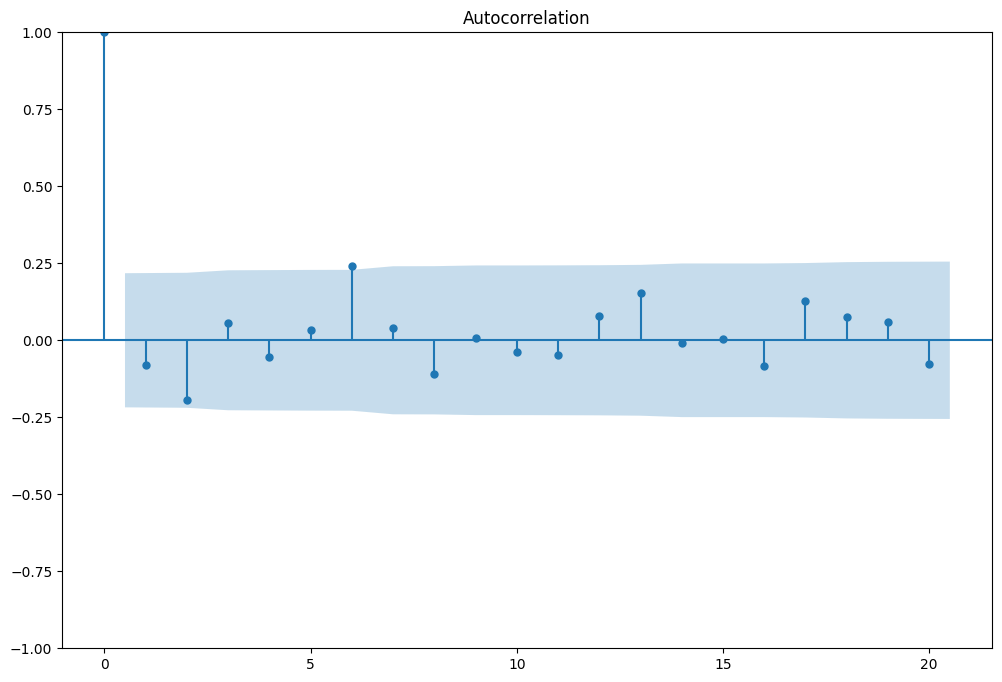

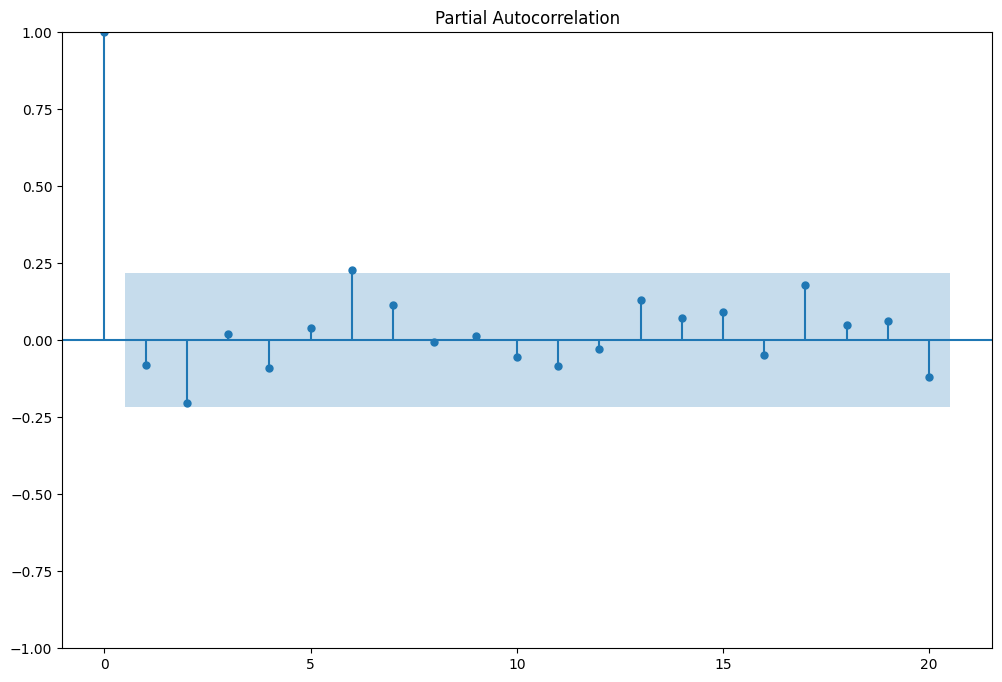

In [41]:
plot_acf(result.resid);
plot_pacf(result.resid);

In [42]:
resumen2 = pd.DataFrame({'Box-Pierce':Qstar, '* Ljung-Box':Q, 'Valores criticos': vcrits}, index=rezagos)
resumen2.index.name = 'Rezagos'

resumen2.round(4)

,Box-Pierce,* Ljung-Box,Valores criticos
Rezagos,,,
1,0.5215,0.5410,3.8415
2,3.5872,3.7619,5.9915
3,3.8409,4.0319,7.8147
4,4.0689,4.2777,9.4877
5,4.1610,4.3783,11.0705
6,8.8274,9.5424,12.5916
7,8.9599,9.6911,14.0671


In [43]:
result.resid.mean()

0.04736476647860397

In [44]:
result.resid.var()

1.701798368889947

GRACIAS POR SU ATENCION ! 💻